# **import libraries**

In [1]:
!pip install catboost


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


# **Load and discover the data**

In [3]:
train_data=pd.read_csv('/content/Train_data.csv')
test_data=pd.read_csv('/content/test_data.csv')

In [4]:
train_data.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


In [5]:
test_data.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.001827,0.033693,0.114755,0.997927,0.562604,0.866499,0.578042,0.914615,0.026864,0.038641,...,0.653230,0.186104,0.430398,0.016678,0.885352,0.652733,0.788235,0.054788,0.031313,Thalasse
1,0.436679,0.972653,0.084998,0.180909,0.675736,0.563889,0.798382,0.670361,0.376092,0.184890,...,0.833540,0.153001,0.458533,0.401845,0.635969,0.574425,0.047025,0.607985,0.594123,Diabetes
2,0.545697,0.324815,0.584467,0.475748,0.558596,0.661007,0.934056,0.381782,0.500342,0.531829,...,0.678901,0.220479,0.817151,0.690981,0.101633,0.855740,0.551124,0.413294,0.070909,Heart Di
3,0.172994,0.050351,0.736000,0.782022,0.069435,0.085219,0.032907,0.460619,0.785448,0.491495,...,0.381500,0.459396,0.420154,0.798537,0.399236,0.324600,0.499504,0.436662,0.242766,Diabetes
4,0.758534,0.739968,0.597868,0.772683,0.875720,0.860265,0.486189,0.486686,0.621048,0.191756,...,0.993381,0.272338,0.663579,0.265227,0.918847,0.804910,0.571119,0.188368,0.750848,Heart Di


In [6]:
train_data.tail()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
2346,0.012956,0.336925,0.451218,0.175006,0.734664,0.382770,0.656463,0.177502,0.808162,0.684499,...,0.670665,0.311568,0.595083,0.155866,0.885812,0.636125,0.132226,0.716519,0.006121,Diabetes
2347,0.407101,0.124738,0.983306,0.663867,0.361113,0.663716,0.232516,0.341056,0.847441,0.309766,...,0.491185,0.701914,0.218104,0.790341,0.570902,0.339125,0.310964,0.310900,0.622403,Thalasse
2348,0.344356,0.783918,0.582171,0.996841,0.065363,0.242885,0.658851,0.543017,0.290106,0.838722,...,0.141738,0.155871,0.473638,0.250535,0.387197,0.344728,0.606719,0.395145,0.134021,Anemia
2349,0.351722,0.014278,0.898615,0.167550,0.727148,0.046091,0.900434,0.136227,0.134361,0.279219,...,0.570553,0.171245,0.858352,0.362012,0.290984,0.996873,0.882164,0.411158,0.146255,Diabetes
2350,0.032726,0.053596,0.102633,0.221356,0.153956,0.216573,0.312577,0.608940,0.486174,0.450700,...,0.188750,0.331887,0.562622,0.680462,0.099538,0.982893,0.437285,0.288961,0.709262,Anemia


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2351 non-null   float64
 1   Cholesterol                                2351 non-null   float64
 2   Hemoglobin                                 2351 non-null   float64
 3   Platelets                                  2351 non-null   float64
 4   White Blood Cells                          2351 non-null   float64
 5   Red Blood Cells                            2351 non-null   float64
 6   Hematocrit                                 2351 non-null   float64
 7   Mean Corpuscular Volume                    2351 non-null   float64
 8   Mean Corpuscular Hemoglobin                2351 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2351 non-null   float64
 10  Insulin                 

In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    486 non-null    float64
 1   Cholesterol                                486 non-null    float64
 2   Hemoglobin                                 486 non-null    float64
 3   Platelets                                  486 non-null    float64
 4   White Blood Cells                          486 non-null    float64
 5   Red Blood Cells                            486 non-null    float64
 6   Hematocrit                                 486 non-null    float64
 7   Mean Corpuscular Volume                    486 non-null    float64
 8   Mean Corpuscular Hemoglobin                486 non-null    float64
 9   Mean Corpuscular Hemoglobin Concentration  486 non-null    float64
 10  Insulin                   

In [9]:
train_data.describe()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
count,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,...,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000
mean,0.362828,0.393648,0.586190,0.504027,0.511086,0.506590,0.507152,0.492200,0.484459,0.562273,...,0.374373,0.439112,0.421777,0.546079,0.434972,0.452138,0.582255,0.425075,0.454597,0.430308
std,0.251889,0.239449,0.271498,0.303347,0.277270,0.266565,0.285537,0.275735,0.315618,0.273281,...,0.256981,0.263779,0.252124,0.269511,0.267388,0.242075,0.250915,0.229298,0.251189,0.243034
min,0.010994,0.012139,0.003021,0.012594,0.010139,0.044565,0.011772,0.046942,0.000554,0.006947,...,0.005217,0.016256,0.033037,0.039505,0.007186,0.013013,0.114550,0.021239,0.007490,0.004867
25%,0.129198,0.195818,0.346092,0.200865,0.259467,0.263589,0.288132,0.287532,0.207938,0.355774,...,0.184604,0.188750,0.217757,0.307132,0.211078,0.239659,0.339125,0.213026,0.288961,0.196192
50%,0.351722,0.397083,0.609836,0.533962,0.527381,0.467431,0.493428,0.453052,0.420723,0.603635,...,0.317857,0.466375,0.413071,0.512941,0.373235,0.486317,0.610860,0.417295,0.426863,0.481601
75%,0.582278,0.582178,0.791215,0.754841,0.743164,0.743670,0.753657,0.722293,0.778160,0.741381,...,0.572330,0.652514,0.604753,0.779378,0.710319,0.616181,0.800666,0.606719,0.682164,0.631426
max,0.968460,0.905026,0.983306,0.999393,0.990786,1.000000,0.977520,0.995263,0.963235,0.975586,...,0.973679,0.950218,0.983826,0.989411,0.942549,0.994460,0.996873,0.925924,0.972803,0.797906


In [10]:
test_data.describe()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
count,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,...,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000
mean,0.490044,0.506797,0.485502,0.528136,0.509783,0.504347,0.501042,0.516185,0.510145,0.501105,...,0.498538,0.489365,0.501706,0.487933,0.500615,0.499675,0.493794,0.515541,0.510077,0.517365
std,0.284196,0.282871,0.298818,0.292610,0.290887,0.302865,0.294501,0.279954,0.285213,0.290614,...,0.288848,0.290849,0.286729,0.292726,0.285374,0.301451,0.292400,0.287223,0.294011,0.291645
min,0.001827,0.003088,0.000719,0.000006,-0.000206,0.000552,0.004556,0.000309,-0.000614,0.000719,...,0.001885,-0.000991,0.001036,-0.000546,-0.000312,0.002047,0.002145,0.008831,0.005714,-0.000991
25%,0.236664,0.268021,0.201994,0.276155,0.264944,0.218573,0.246255,0.287755,0.259967,0.255839,...,0.238772,0.239302,0.262516,0.229095,0.251076,0.239369,0.228581,0.262924,0.267101,0.263192
50%,0.496471,0.502397,0.477706,0.538642,0.511102,0.518103,0.496275,0.533319,0.498332,0.493929,...,0.503164,0.481549,0.511373,0.481533,0.515321,0.497846,0.507581,0.526299,0.508479,0.546542
75%,0.727144,0.754638,0.750028,0.789486,0.767896,0.768466,0.761107,0.746765,0.761956,0.734817,...,0.749527,0.725472,0.756136,0.741867,0.739248,0.775458,0.751124,0.777839,0.781128,0.776940
max,0.991742,0.999606,0.997876,0.999507,0.999646,0.997267,1.000857,0.996362,0.999234,0.999666,...,0.999826,0.999265,0.999567,1.000744,1.000326,1.000402,0.999857,0.999348,1.000125,0.999488


In [11]:
train_data.isnull().sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

In [12]:
test_data.isnull().sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

In [13]:
train_data.isna().sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

In [14]:
test_data.isna().sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

# **Visualize the data**

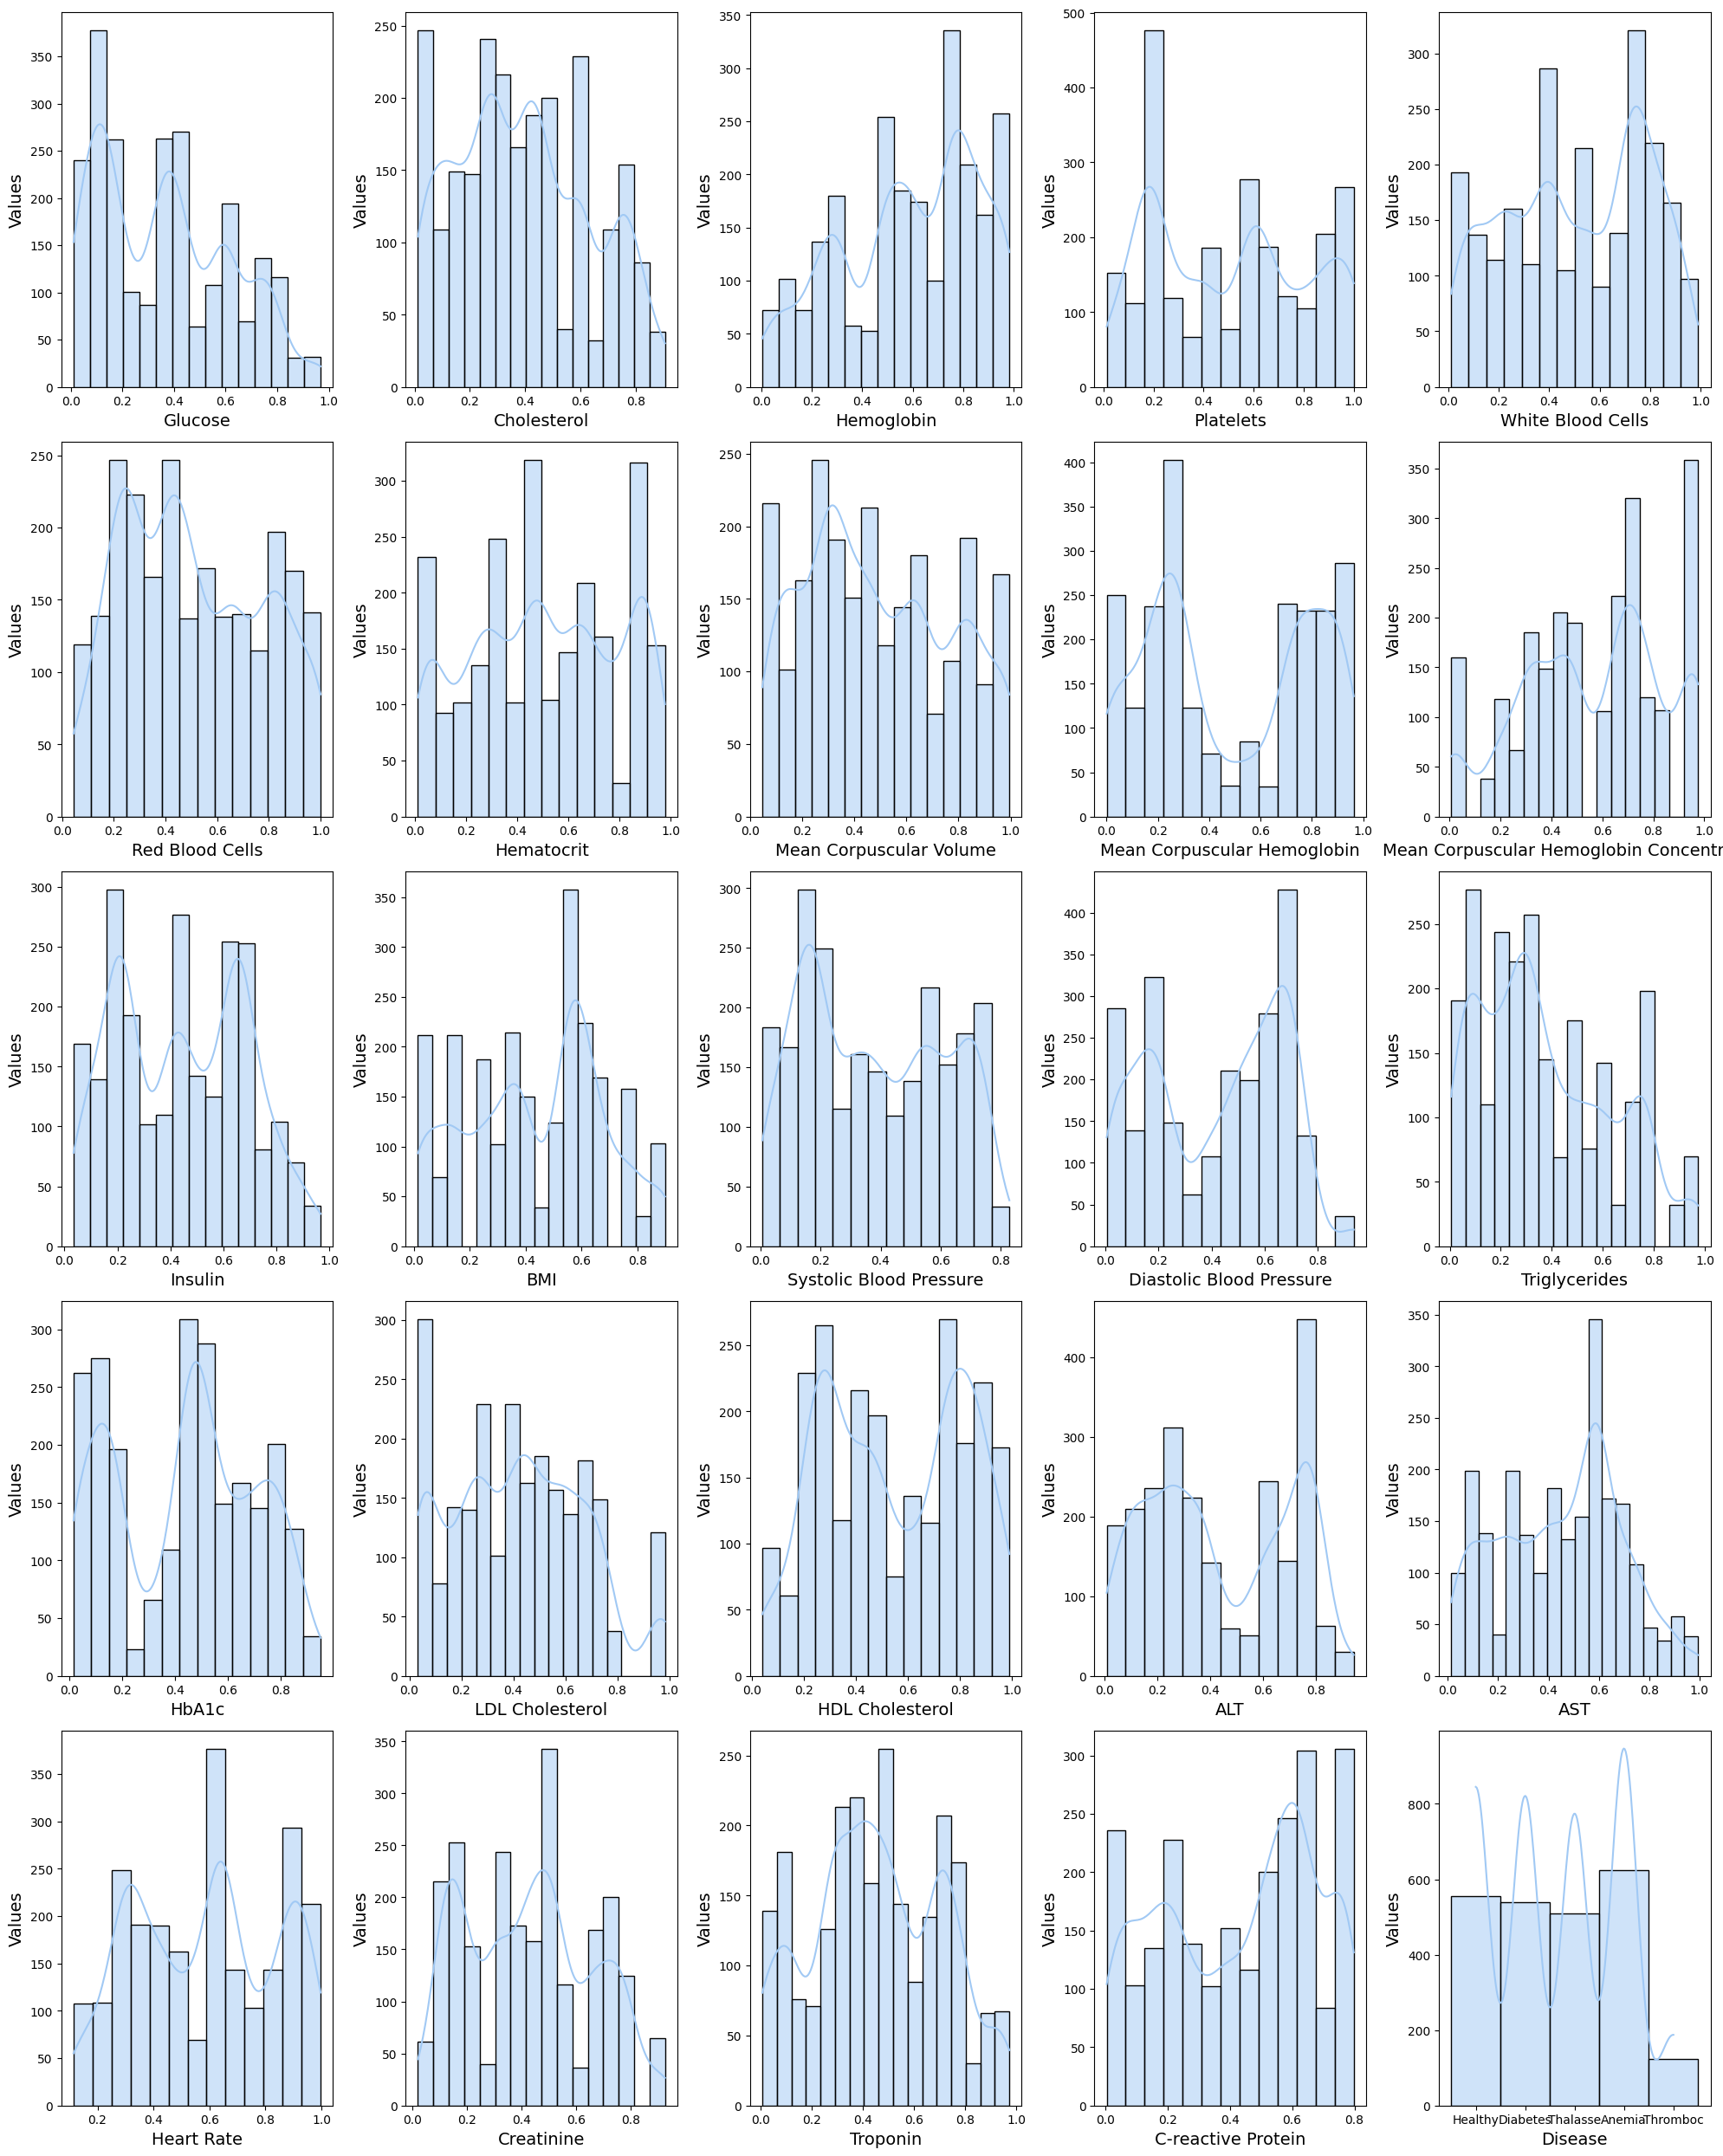

In [15]:
# Set pastel palette
sns.set_palette("pastel")

# Plotting the distribution plot.
plt.figure(figsize=(20, 25))
plot_number = 1

for column in train_data.columns:
    if plot_number <= 25:
        ax = plt.subplot(5, 5, plot_number)
        sns.histplot(train_data[column], ax=ax, kde=True)
        plt.xlabel(column, fontsize=14)
        plt.ylabel('Values', fontsize=14)
    plot_number += 1

plt.tight_layout()
plt.show()


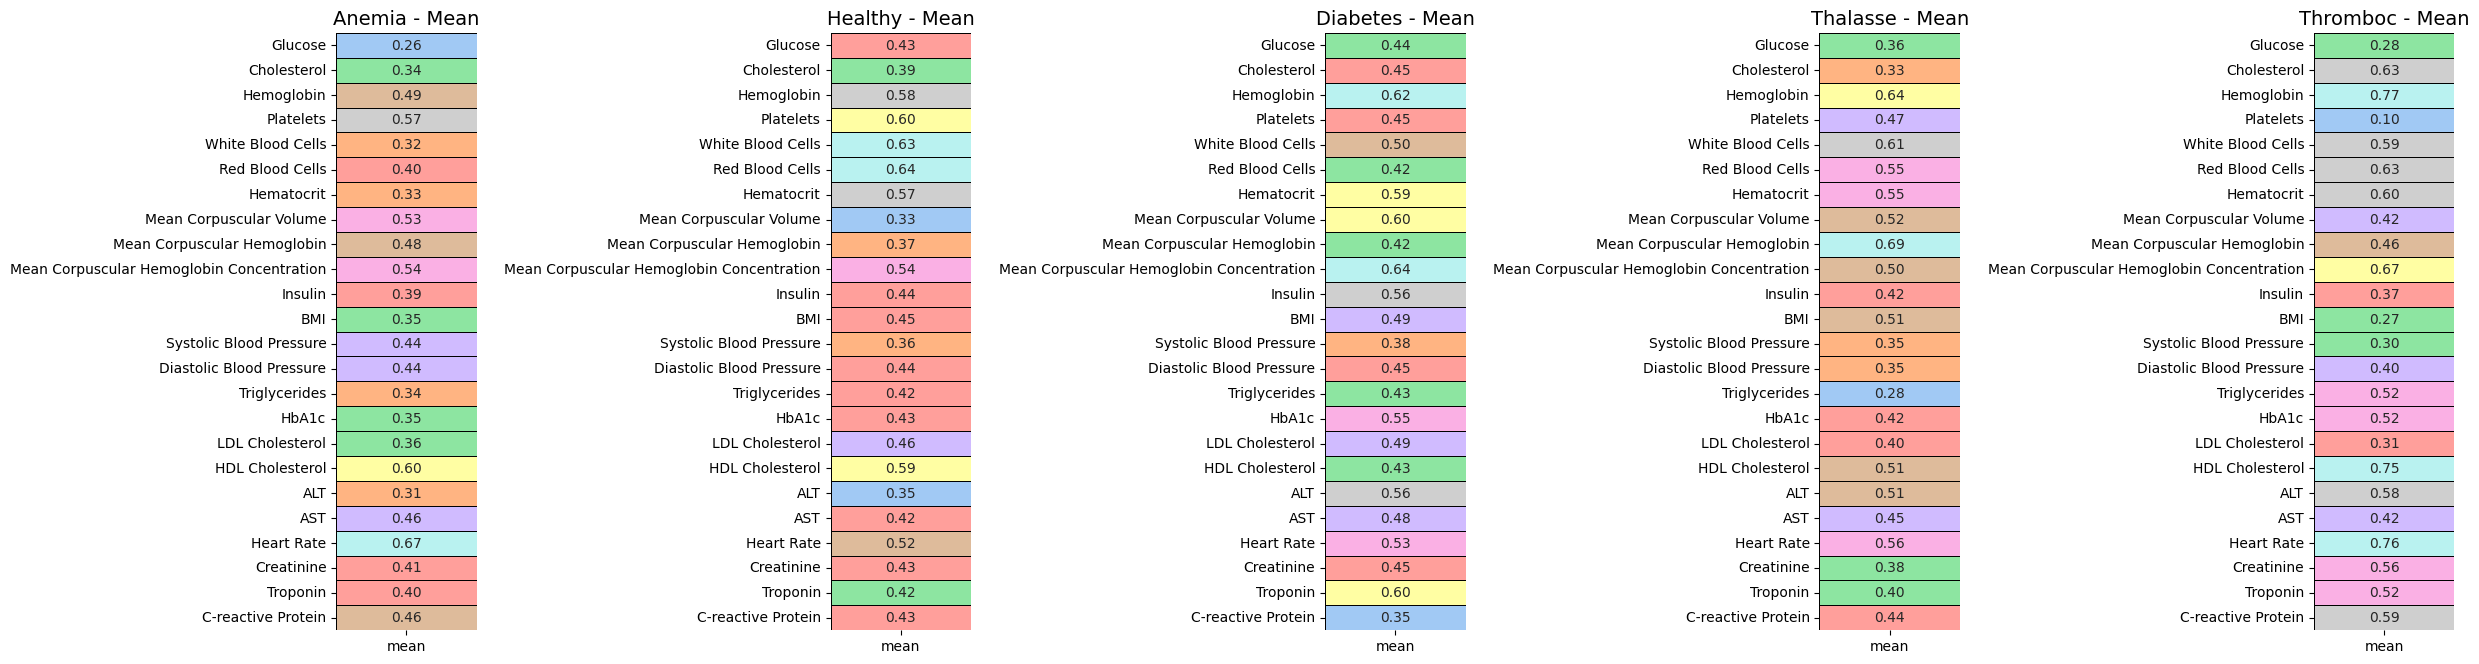

In [16]:
# Define statistics for each disease category
Anemia = train_data[train_data['Disease'] == 'Anemia'].describe().T
Healthy = train_data[train_data['Disease'] == 'Healthy'].describe().T
Diabetes = train_data[train_data['Disease'] == 'Diabetes'].describe().T
Thalasse = train_data[train_data['Disease'] == 'Thalasse'].describe().T
Thromboc = train_data[train_data['Disease'] == 'Thromboc'].describe().T

# Define dataframes for each disease category
disease_stats = {
    'Anemia': Anemia,
    'Healthy': Healthy,
    'Diabetes': Diabetes,
    'Thalasse': Thalasse,
    'Thromboc': Thromboc
}

# Define pastel palette
pastel_palette = sns.color_palette("pastel")

# Create subplots
fig, ax = plt.subplots(1, len(disease_stats), figsize=(25, 7))

# Plot heatmaps for each disease category with the pastel colormap
for i, (disease, stats) in enumerate(disease_stats.items()):
    sns.heatmap(stats[['mean']], annot=True, cmap=pastel_palette,
                linewidths=0.4, linecolor='black', cbar=False, fmt='.2f', ax=ax[i])
    ax[i].set_title(f'{disease} - Mean', fontsize=14)

# Adjust layout
fig.tight_layout(pad=2)

# Show plot
plt.show()


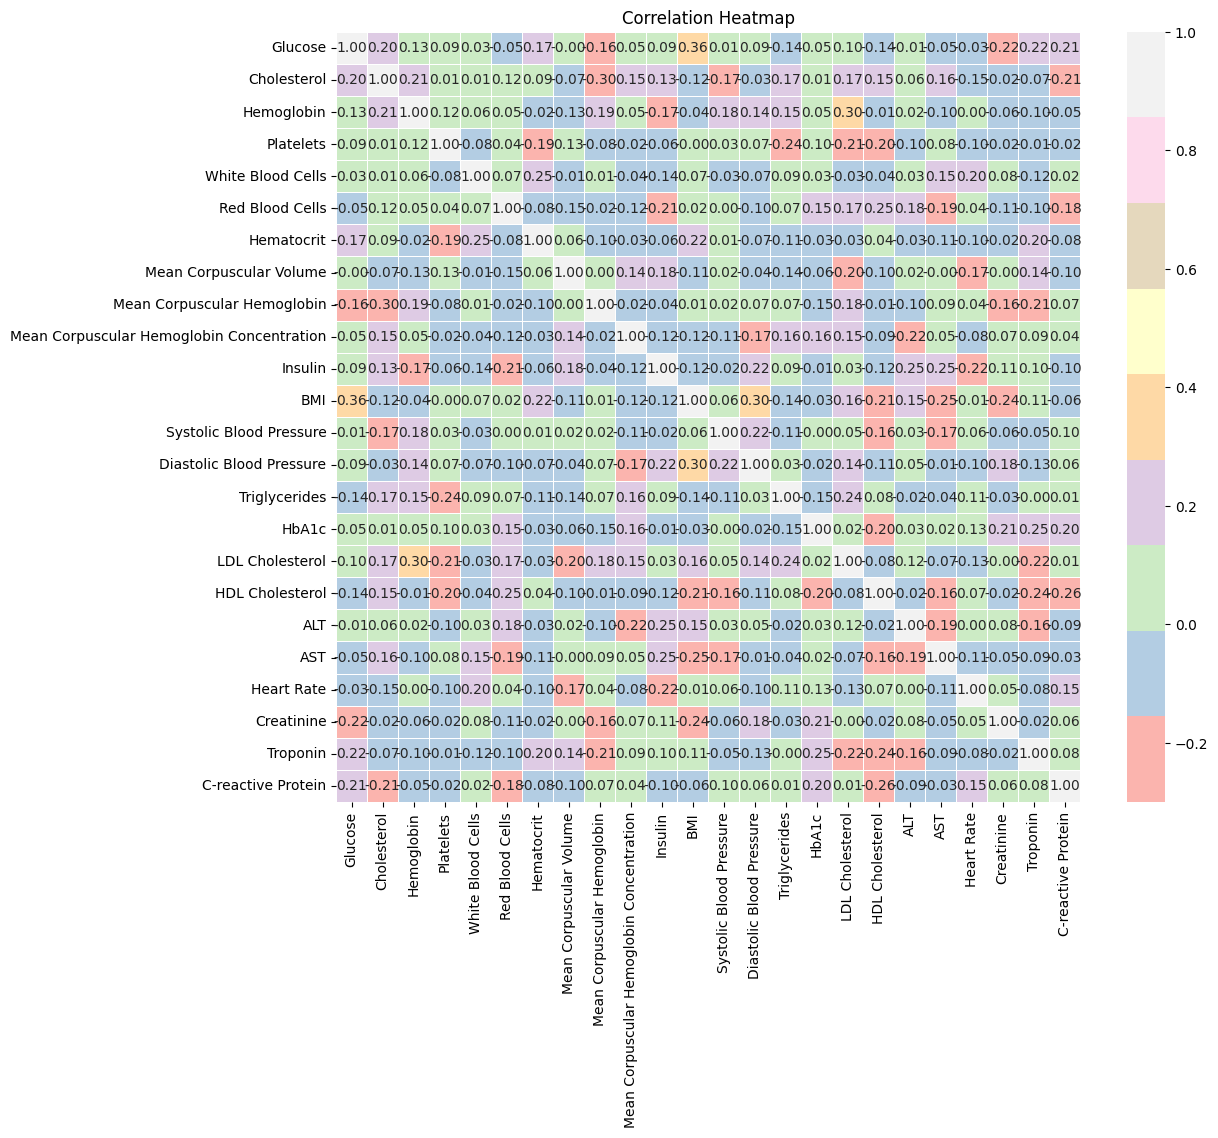

In [17]:
# Select only numeric columns
numeric_columns = train_data.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

# Set pastel palette
sns.set_palette("pastel")

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="Pastel1", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [18]:
train_data['Disease'].value_counts()

Disease
Anemia      623
Healthy     556
Diabetes    540
Thalasse    509
Thromboc    123
Name: count, dtype: int64

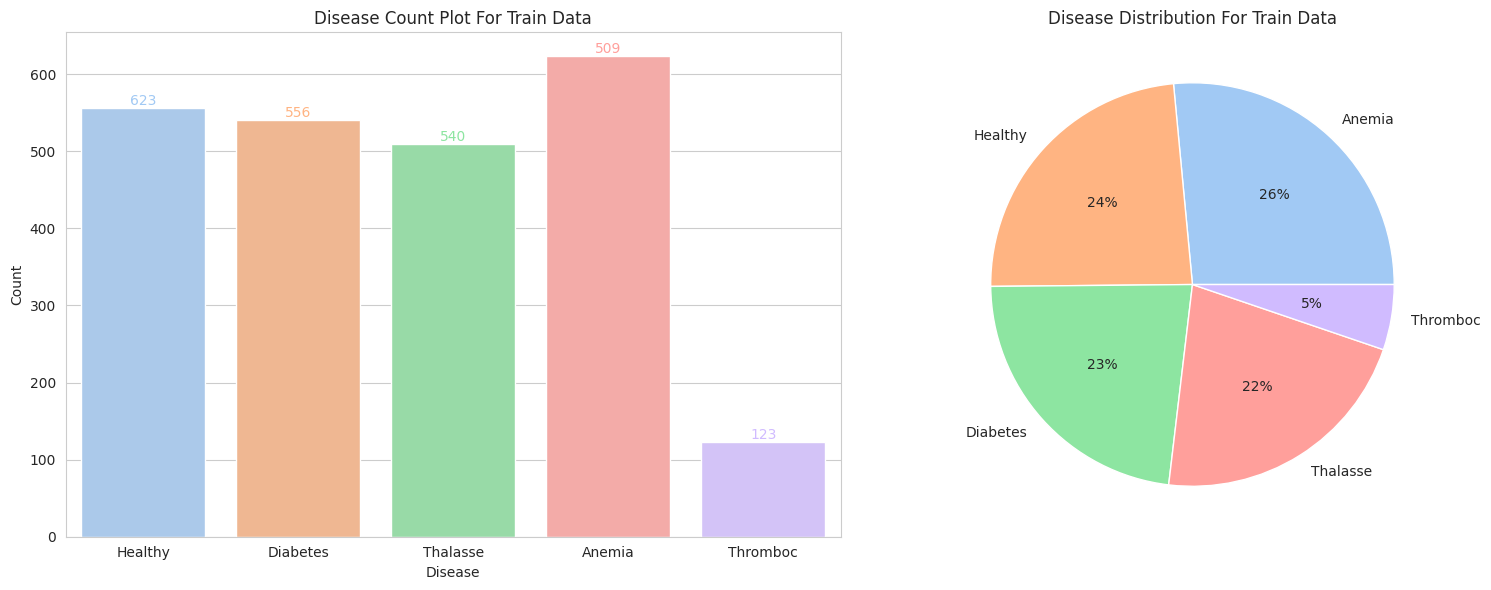

In [34]:
# Calculate value counts for the 'Disease' column
disease_counts = train_data['Disease'].value_counts()

# Set pastel palette
pastel_palette = sns.color_palette("pastel", len(disease_counts))

# Set seaborn style to whitegrid
sns.set_style("whitegrid")

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot count plot with grid
sns.countplot(x='Disease', data=train_data, palette=pastel_palette, ax=ax1, hue='Disease', legend=False)
ax1.set_ylabel("Count")
ax1.set_xlabel("Disease")
ax1.set_title("Disease Count Plot For Train Data")

# Add count labels and assign colors
for bar, count, color in zip(ax1.patches, disease_counts, pastel_palette):
    ax1.annotate(f"{count}", (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha="center", va="bottom", color=color)

# Plot pie chart
ax2.pie(disease_counts, labels=disease_counts.index, autopct='%1.0f%%', colors=pastel_palette)
ax2.set_title("Disease Distribution For Train Data")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [20]:
test_data['Disease'].value_counts()

Disease
Diabetes    294
Anemia       84
Thalasse     48
Heart Di     39
Thromboc     16
Healthy       5
Name: count, dtype: int64

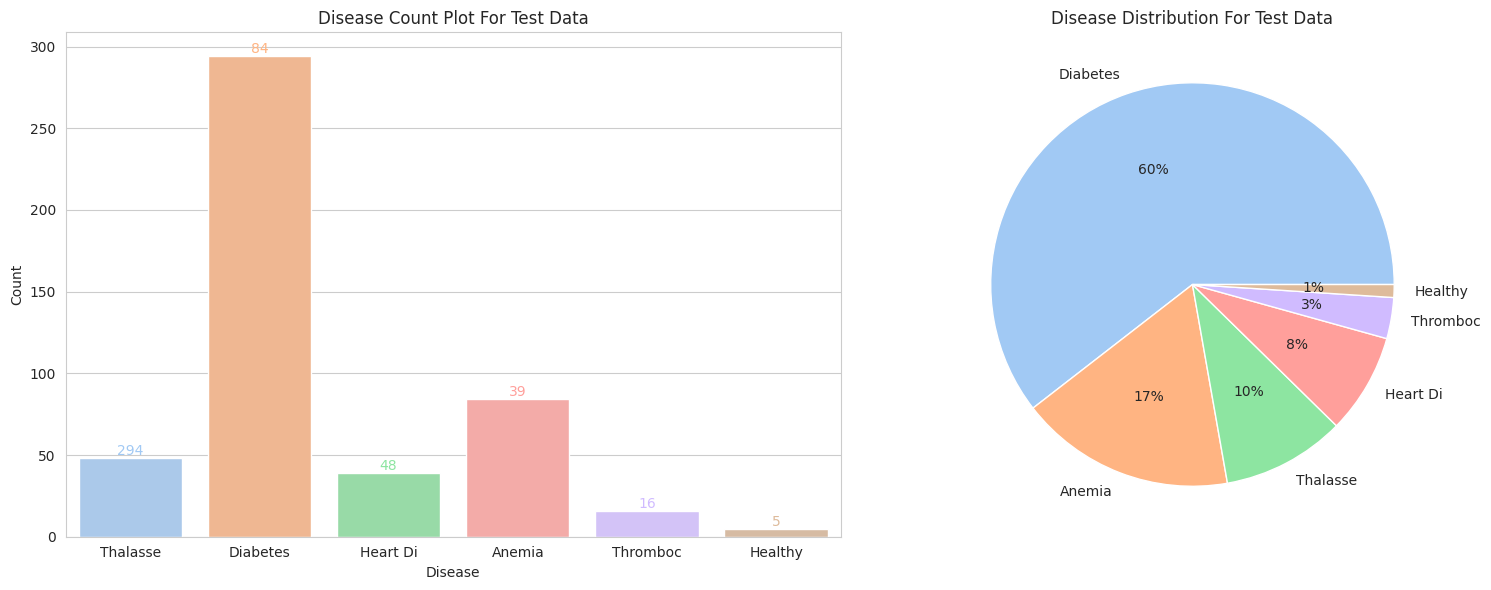

In [35]:
# Calculate value counts for the 'Disease' column
disease_counts = test_data['Disease'].value_counts()

# Set pastel palette
pastel_palette = sns.color_palette("pastel", len(disease_counts))

# Set seaborn style to whitegrid
sns.set_style("whitegrid")

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot count plot with grid
sns.countplot(x='Disease', data=test_data, palette=pastel_palette, ax=ax1, hue='Disease', legend=False)
ax1.set_ylabel("Count")
ax1.set_xlabel("Disease")
ax1.set_title("Disease Count Plot For Test Data")

# Add count labels and assign colors
for bar, count, color in zip(ax1.patches, disease_counts, pastel_palette):
    ax1.annotate(f"{count}", (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha="center", va="bottom", color=color)

# Plot pie chart
ax2.pie(disease_counts, labels=disease_counts.index, autopct='%1.0f%%', colors=pastel_palette)
ax2.set_title("Disease Distribution For Test Data")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


Merge the train and test sets so we can ensure consistency in preprocessing, as the target column in the test set contains one additional category compared to the train set

In [22]:
# Combine the train and test data
combined_data = pd.concat([train_data, test_data], ignore_index=True)

# Shuffle the combined data
combined_data_shuffled = shuffle(combined_data)

# Display the first few rows of the shuffled combined data
combined_data_shuffled.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
677,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
1369,0.729868,0.905026,0.520473,0.306955,0.743164,0.667150,0.769573,0.183771,0.246542,0.161920,...,0.188792,0.977656,0.341007,0.797158,0.994460,0.591303,0.425296,0.007490,0.196192,Diabetes
348,0.729868,0.905026,0.520473,0.306955,0.743164,0.667150,0.769573,0.183771,0.246542,0.161920,...,0.188792,0.977656,0.341007,0.797158,0.994460,0.591303,0.425296,0.007490,0.196192,Diabetes
1354,0.351722,0.014278,0.898615,0.167550,0.727148,0.046091,0.900434,0.136227,0.134361,0.279219,...,0.570553,0.171245,0.858352,0.362012,0.290984,0.996873,0.882164,0.411158,0.146255,Diabetes
2014,0.023959,0.191150,0.201433,0.533962,0.047183,0.129290,0.639516,0.983864,0.389457,0.430220,...,0.578461,0.678578,0.716571,0.279678,0.488846,0.295502,0.649181,0.300423,0.199513,Anemia


In [23]:
# Define the mapping dictionary
disease_mapping = {
    'Healthy': 0,
    'Diabetes': 1,
    'Anemia': 2,
    'Thalasse': 3,
    'Heart Di': 4,
    'Thromboc': 5
}

# Map the 'Disease' column to numeric values and store it in a new column
combined_data_shuffled['Disease_Numeric'] = combined_data_shuffled['Disease'].map(disease_mapping)


## **Split the data to train ,validation and test sets**

In [24]:
# split the data into X and y
X = combined_data_shuffled.drop(columns=['Disease','Disease_Numeric'])
y = combined_data_shuffled['Disease_Numeric']

# Split the shuffled combined data into features and target variable
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=42)

# Display the shapes of the train, validation, and test sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Train set shape: (2049, 24) (2049,)
Validation set shape: (362, 24) (362,)
Test set shape: (426, 24) (426,)


## **Applying SMOTE to balance the target column**

In [25]:
# Initialize SMOTE
smote = SMOTE()

# Apply SMOTE to the training data only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


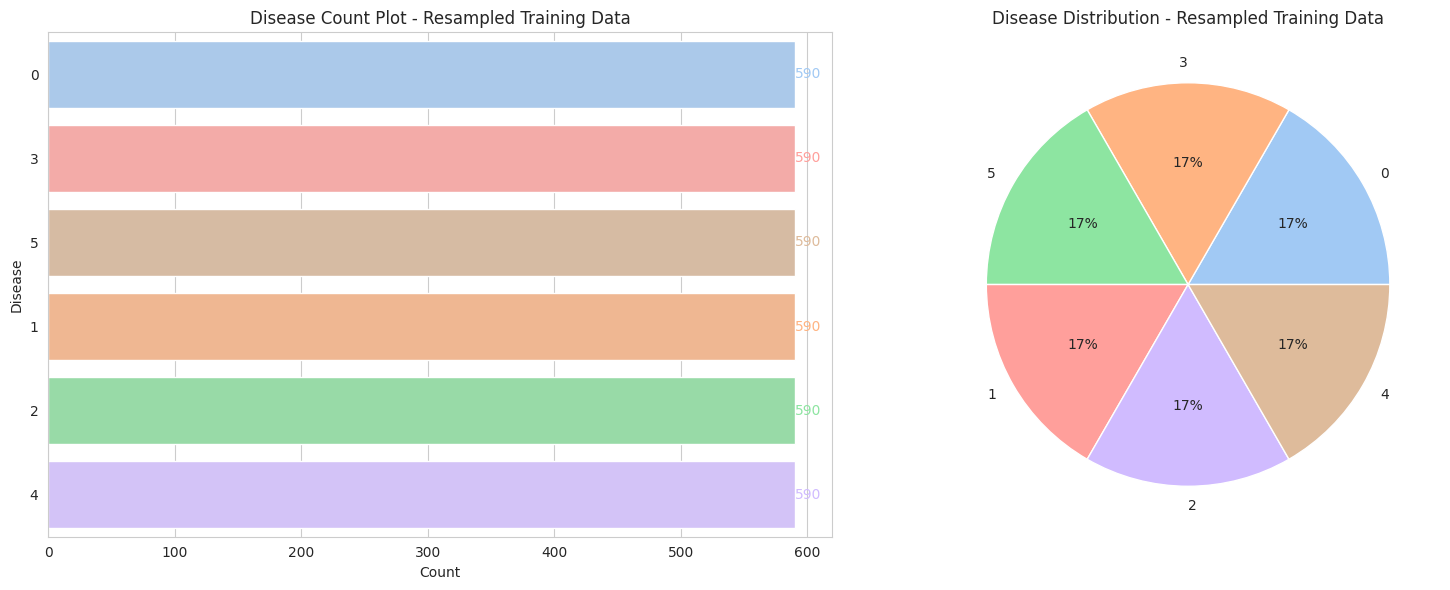

In [26]:
# Calculate value counts for the resampled 'Disease' column
resampled_disease_counts = y_train_resampled.value_counts()

# Set pastel palette
pastel_palette = sns.color_palette("pastel", len(resampled_disease_counts))

# Set seaborn style to whitegrid
sns.set_style("whitegrid")

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot count plot with grid for resampled data
sns.countplot(y=y_train_resampled, hue=y_train_resampled, palette=pastel_palette, ax=ax1, order=y_train_resampled.value_counts().index, legend=False)

ax1.set_ylabel("Disease")
ax1.set_xlabel("Count")
ax1.set_title("Disease Count Plot - Resampled Training Data")

# Add count labels and assign colors
for bar, count, color in zip(ax1.patches, resampled_disease_counts, pastel_palette):
    ax1.annotate(f"{count}", (bar.get_width(), bar.get_y() + bar.get_height() / 2), ha="left", va="center", color=color)

# Plot pie chart for resampled data
ax2.pie(resampled_disease_counts, labels=resampled_disease_counts.index, autopct='%1.0f%%', colors=pastel_palette)
ax2.set_title("Disease Distribution - Resampled Training Data")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


## **Applying MinMaxScaler**

In [27]:
# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_val_scaled=scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

## **Modeling**

In [28]:
# Define models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier()
}

# Initialize lists to store training and validation scores
train_accuracy_scores = []
train_f1_scores = []
val_accuracy_scores = []
val_f1_scores = []

# Iterate over models
for name, model in models.items():
    # Fit the model on the training data
    model.fit(X_train_resampled_scaled, y_train_resampled)

    # Make predictions on the training data
    y_train_pred = model.predict(X_train_resampled_scaled)
    # Make predictions on the validation data
    y_val_pred = model.predict(X_val_scaled)

    # Calculate metrics for the training data
    train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
    train_f1 = f1_score(y_train_resampled, y_train_pred, average='weighted')

    # Calculate metrics for the validation data
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')

    # Append scores to lists
    train_accuracy_scores.append(train_accuracy)
    train_f1_scores.append(train_f1)
    val_accuracy_scores.append(val_accuracy)
    val_f1_scores.append(val_f1)

    # Print scores
    print(f"{name} - Training Accuracy: {train_accuracy:.2f}, Training F1 Score: {train_f1:.2f}")
    print(f"{name} - Validation Accuracy: {val_accuracy:.2f}, Validation F1 Score: {val_f1:.2f}")
    print()




Random Forest - Training Accuracy: 0.98, Training F1 Score: 0.98
Random Forest - Validation Accuracy: 0.96, Validation F1 Score: 0.96

SVM - Training Accuracy: 1.00, Training F1 Score: 1.00
SVM - Validation Accuracy: 0.96, Validation F1 Score: 0.95

KNN - Training Accuracy: 0.94, Training F1 Score: 0.94
KNN - Validation Accuracy: 0.87, Validation F1 Score: 0.88

XGBoost - Training Accuracy: 1.00, Training F1 Score: 1.00
XGBoost - Validation Accuracy: 0.99, Validation F1 Score: 0.99

Learning rate set to 0.084396
0:	learn: 1.6116248	total: 92.4ms	remaining: 1m 32s
1:	learn: 1.4688692	total: 122ms	remaining: 1m
2:	learn: 1.3472996	total: 152ms	remaining: 50.7s
3:	learn: 1.2523299	total: 185ms	remaining: 46.1s
4:	learn: 1.1634366	total: 215ms	remaining: 42.8s
5:	learn: 1.0840530	total: 245ms	remaining: 40.5s
6:	learn: 1.0220765	total: 275ms	remaining: 39s
7:	learn: 0.9610030	total: 306ms	remaining: 37.9s
8:	learn: 0.9122829	total: 337ms	remaining: 37.1s
9:	learn: 0.8664257	total: 368ms	re

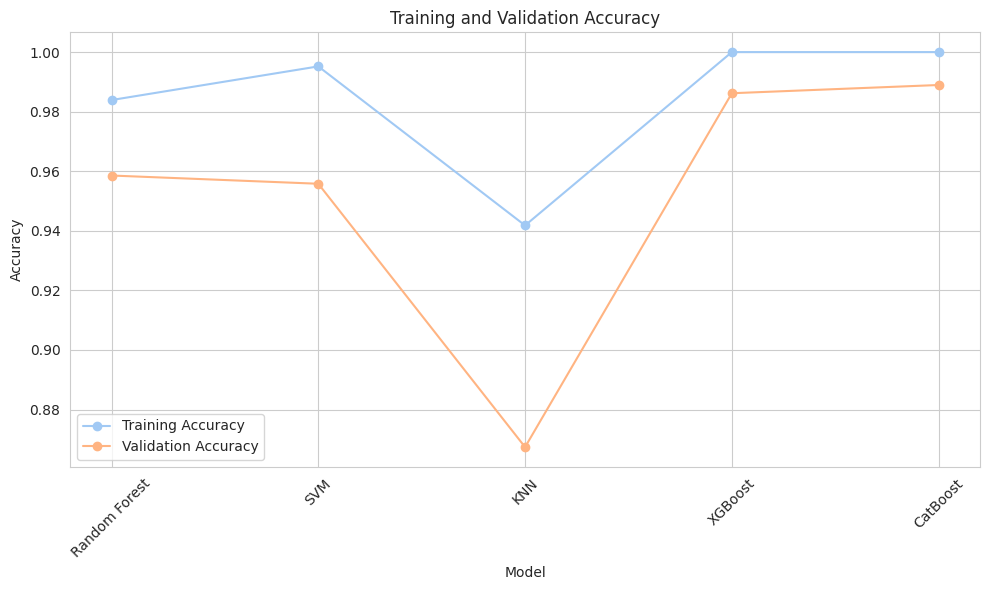

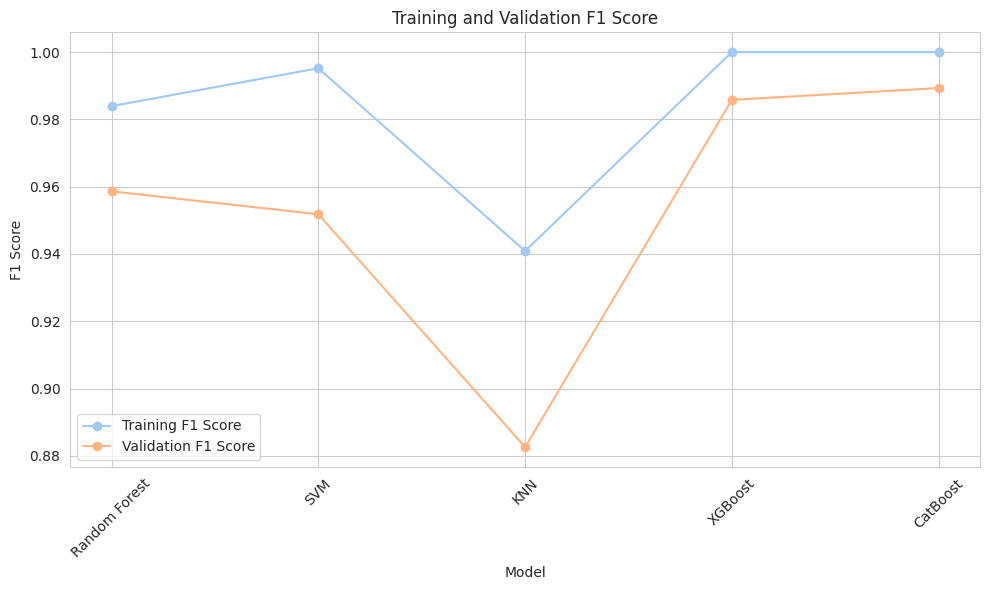

In [29]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(models.keys(), train_accuracy_scores, marker='o', label='Training Accuracy')
plt.plot(models.keys(), val_accuracy_scores, marker='o', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot training and validation F1 score
plt.figure(figsize=(10, 6))
plt.plot(models.keys(), train_f1_scores, marker='o', label='Training F1 Score')
plt.plot(models.keys(), val_f1_scores, marker='o', label='Validation F1 Score')
plt.title('Training and Validation F1 Score')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


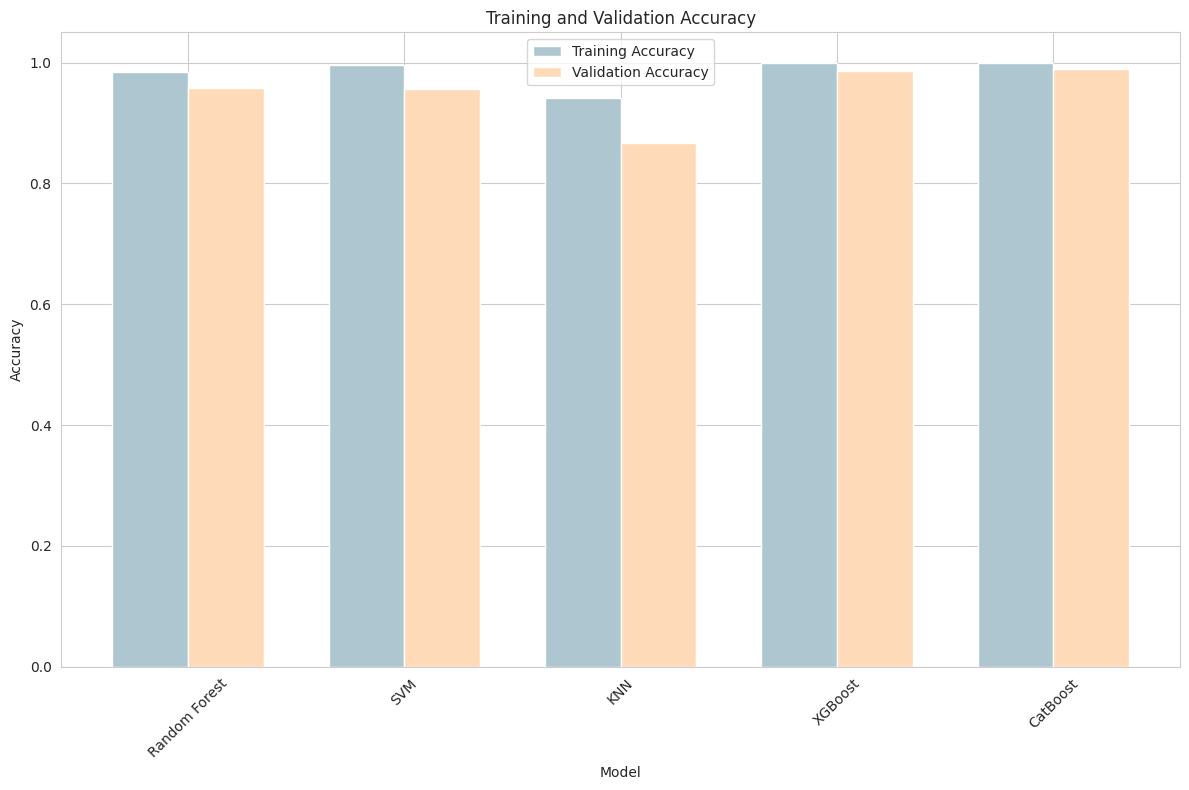

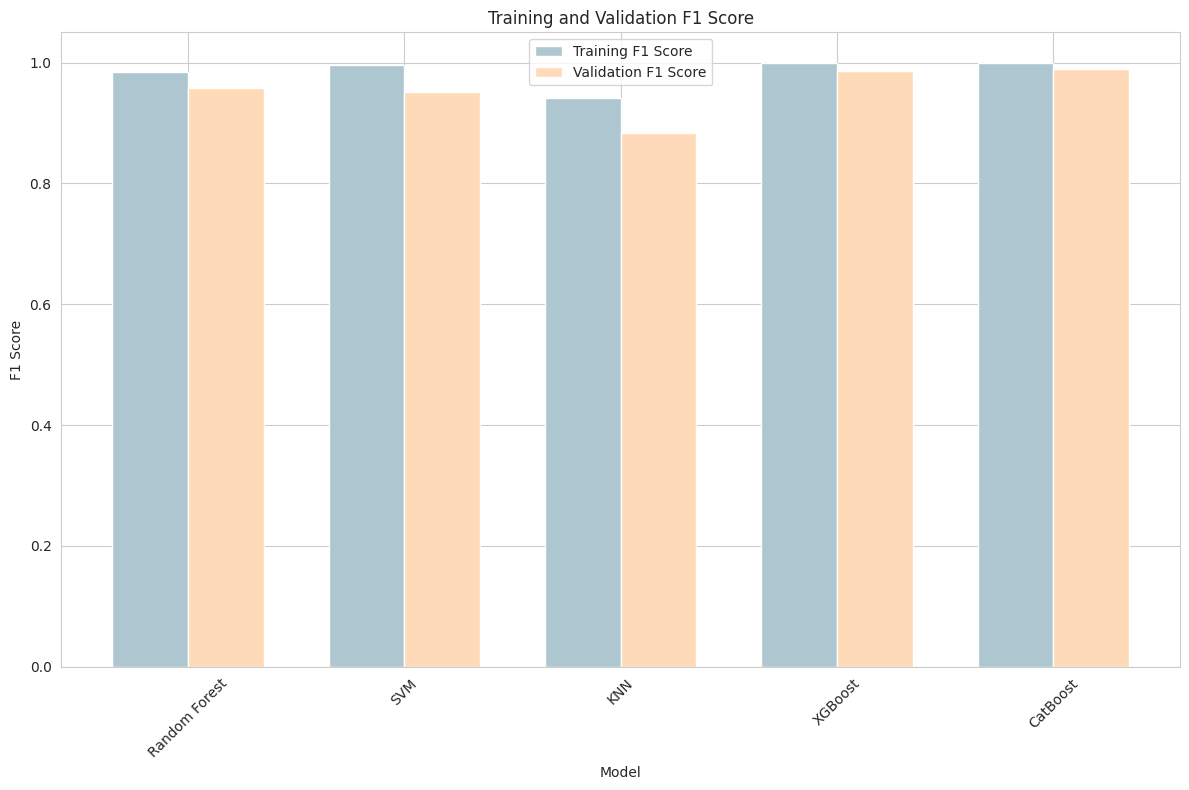

In [30]:
# Define pastel blue color palette
pastel_blue_palette = ['#AEC6CF', '#FFDAB9']
# Define the width of each bar
bar_width = 0.35

# Define the x locations for the groups
x = np.arange(len(models.keys()))

# Plot training and validation accuracy
plt.figure(figsize=(12, 8))
plt.bar(x - bar_width/2, train_accuracy_scores, bar_width, label='Training Accuracy',color=pastel_blue_palette[0])
plt.bar(x + bar_width/2, val_accuracy_scores, bar_width, label='Validation Accuracy',color=pastel_blue_palette[1])
plt.title('Training and Validation Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(x, models.keys(), rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot training and validation F1 score
plt.figure(figsize=(12, 8))
plt.bar(x - bar_width/2, train_f1_scores, bar_width, label='Training F1 Score',color=pastel_blue_palette[0])
plt.bar(x + bar_width/2, val_f1_scores, bar_width, label='Validation F1 Score',color=pastel_blue_palette[1])
plt.title('Training and Validation F1 Score')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.xticks(x, models.keys(), rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## **Champion models**

In [31]:

# Initialize XGBoost classifier
xgb_classifier = XGBClassifier()

# Fit XGBoost classifier on the resampled training data
xgb_classifier.fit(X_train_resampled_scaled, y_train_resampled)

# Make predictions on the test data using XGBoost classifier
y_test_pred_xgb = xgb_classifier.predict(X_test_scaled)

# Calculate accuracy and F1 score for XGBoost classifier on the test data
test_accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)
test_f1_score_xgb = f1_score(y_test, y_test_pred_xgb, average='weighted')

print("XGBoost Classifier - Test Accuracy:", test_accuracy_xgb)
print("XGBoost Classifier - Test F1 Score:", test_f1_score_xgb)
print()

# Initialize CatBoost classifier
catboost_classifier = CatBoostClassifier()

# Fit CatBoost classifier on the resampled training data
catboost_classifier.fit(X_train_resampled_scaled, y_train_resampled)

# Make predictions on the test data using CatBoost classifier
y_test_pred_catboost = catboost_classifier.predict(X_test_scaled)

# Calculate accuracy and F1 score for CatBoost classifier on the test data
test_accuracy_catboost = accuracy_score(y_test, y_test_pred_catboost)
test_f1_score_catboost = f1_score(y_test, y_test_pred_catboost, average='weighted')

print("CatBoost Classifier - Test Accuracy:", test_accuracy_catboost)
print("CatBoost Classifier - Test F1 Score:", test_f1_score_catboost)


XGBoost Classifier - Test Accuracy: 0.9929577464788732
XGBoost Classifier - Test F1 Score: 0.9929564831774297

Learning rate set to 0.084396
0:	learn: 1.6116248	total: 43.3ms	remaining: 43.3s
1:	learn: 1.4688692	total: 73.1ms	remaining: 36.5s
2:	learn: 1.3472996	total: 103ms	remaining: 34.4s
3:	learn: 1.2523299	total: 133ms	remaining: 33.1s
4:	learn: 1.1634366	total: 163ms	remaining: 32.4s
5:	learn: 1.0840530	total: 196ms	remaining: 32.4s
6:	learn: 1.0220765	total: 225ms	remaining: 31.9s
7:	learn: 0.9610030	total: 261ms	remaining: 32.4s
8:	learn: 0.9122829	total: 296ms	remaining: 32.6s
9:	learn: 0.8664257	total: 328ms	remaining: 32.5s
10:	learn: 0.8300999	total: 360ms	remaining: 32.4s
11:	learn: 0.8008738	total: 392ms	remaining: 32.3s
12:	learn: 0.7660245	total: 429ms	remaining: 32.6s
13:	learn: 0.7304534	total: 462ms	remaining: 32.5s
14:	learn: 0.6975940	total: 495ms	remaining: 32.5s
15:	learn: 0.6687776	total: 531ms	remaining: 32.6s
16:	learn: 0.6410640	total: 563ms	remaining: 32.6s


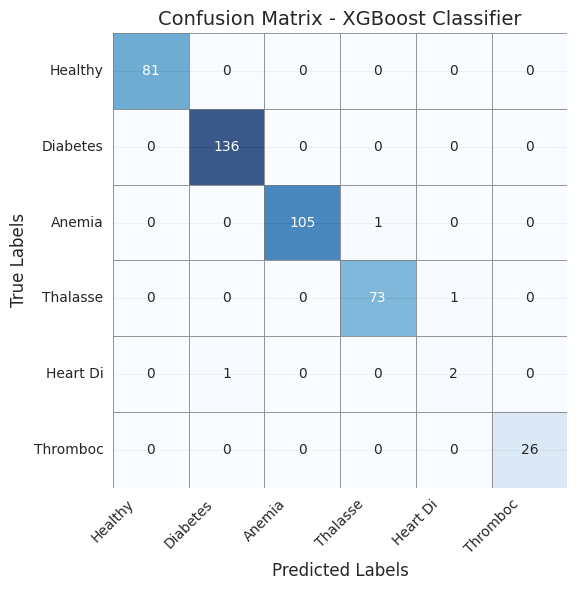

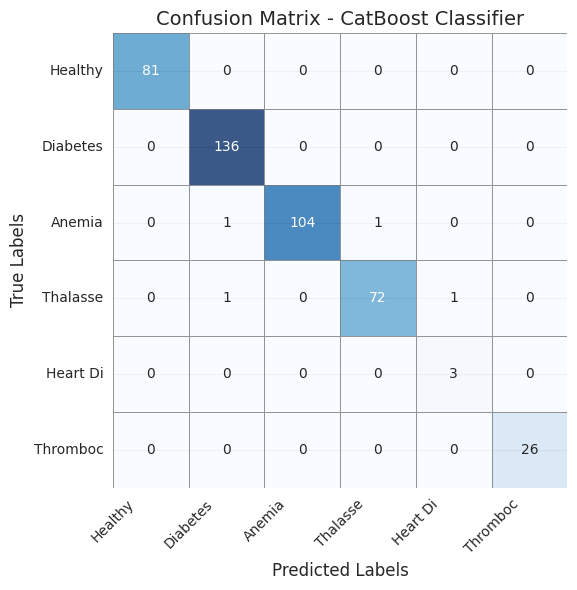

In [32]:
# Define class labels
classes = ['Healthy', 'Diabetes', 'Anemia', 'Thalasse', 'Heart Di', 'Thromboc']

# Calculate confusion matrices
conf_matrix_xgb = confusion_matrix(y_test, y_test_pred_xgb)
conf_matrix_catboost = confusion_matrix(y_test, y_test_pred_catboost)

# Plot confusion matrix for XGBoost classifier
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='gray',
            square=True, annot_kws={"size": 10}, alpha=0.8)
plt.title('Confusion Matrix - XGBoost Classifier', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.xticks(ticks=range(len(classes)), labels=classes, rotation=45)
plt.yticks(ticks=[i + 0.5 for i in range(len(classes))], labels=classes, rotation=0)  # Adjust vertical position
plt.tight_layout()
plt.show()

# Plot confusion matrix for CatBoost classifier
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_catboost, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='gray',
            square=True, annot_kws={"size": 10}, alpha=0.8)
plt.title('Confusion Matrix - CatBoost Classifier', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.xticks(ticks=range(len(classes)), labels=classes, rotation=45)
plt.yticks(ticks=[i + 0.5 for i in range(len(classes))], labels=classes, rotation=0)  # Adjust vertical position
plt.tight_layout()
plt.show()


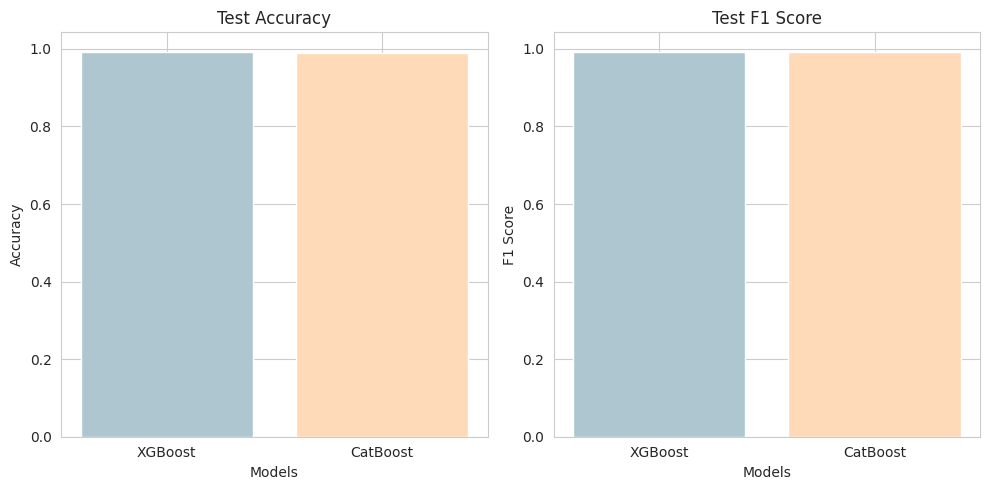

In [33]:
# Define pastel blue color palette
pastel_blue_palette = ['#AEC6CF', '#FFDAB9']

# Data
models = ['XGBoost', 'CatBoost']
test_accuracy = [test_accuracy_xgb, test_accuracy_catboost]
test_f1_score = [test_f1_score_xgb, test_f1_score_catboost]

# Plotting test accuracy
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(models, test_accuracy, color=pastel_blue_palette)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Test Accuracy')

# Plotting test F1 score
plt.subplot(1, 2, 2)
plt.bar(models, test_f1_score, color=pastel_blue_palette)
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('Test F1 Score')

plt.tight_layout()
plt.show()
